In [2]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import VerticalPitch
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
#everything below until pd.concat is basically me just copy pasting curls into the code in order 
#to get responses and scrape the data
response = requests.get(
    'https://www.sofascore.com/paris-saint-germain-newcastle-united/OsUH#11605975',
    headers={
        'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'})

In [3]:
response.status_code

200

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
soup.select('g[cursor="pointer"]')

[]

In [128]:
import requests

headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"3c77617bc6"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
}

response = requests.get('https://api.sofascore.com/api/v1/event/11605972/shotmap', headers=headers)

In [129]:
response.status_code

304

In [130]:
headers['If-Modified-Since'] = 'Sun, 22 Nov 2023 00:00:00 GMT'

In [131]:
response = requests.get('https://api.sofascore.com/api/v1/event/11605972/shotmap', headers=headers)

In [132]:
response.status_code

200

In [133]:
shots = response.json()

In [134]:
shots

{'shotmap': [{'player': {'name': 'Scott McTominay',
    'slug': 'scott-mctominay',
    'shortName': 'S. McTominay',
    'position': 'M',
    'userCount': 8421,
    'id': 879346},
   'isHome': False,
   'shotType': 'miss',
   'situation': 'corner',
   'playerCoordinates': {'x': 8.8, 'y': 54.5, 'z': 0},
   'bodyPart': 'head',
   'goalMouthLocation': 'left',
   'goalMouthCoordinates': {'x': 0, 'y': 70.1, 'z': 22.2},
   'xg': 0.054920244961977,
   'id': 2357395,
   'time': 90,
   'addedTime': 3,
   'timeSeconds': 5520,
   'draw': {'start': {'x': 54.5, 'y': 8.8},
    'end': {'x': 29.9, 'y': 0},
    'goal': {'x': 29.9, 'y': 77.8}},
   'reversedPeriodTime': 1,
   'reversedPeriodTimeSeconds': 780,
   'incidentType': 'shot'},
  {'player': {'name': 'Facundo Pellistri',
    'firstName': '',
    'lastName': '',
    'slug': 'facundo-pellistri',
    'shortName': 'F. Pellistri',
    'position': 'M',
    'userCount': 6900,
    'id': 989803},
   'isHome': False,
   'shotType': 'save',
   'situation': '

In [135]:
df15 = pd.json_normalize(shots['shotmap'])

In [136]:
result_df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis = 0, ignore_index=True)

In [137]:
result_df

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,id,time,addedTime,timeSeconds,...,draw.end.y,draw.goal.x,draw.goal.y,goalType,xgot,blockCoordinates.x,blockCoordinates.y,blockCoordinates.z,draw.block.x,draw.block.y
0,True,miss,assisted,head,high,0.090166,2356657,90,9.0,5910,...,0,51.1,27.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,goal,penalty,right-foot,high-centre,0.788400,2356655,90,8.0,5838,...,0,50.8,72.8,penalty,0.9506,NaN,NaN,NaN,NaN,NaN
2,True,block,assisted,right-foot,low-centre,0.023604,2356649,90,4.0,5631,...,0,51.2,81.0,NaN,NaN,21.4,49.3,0.0,49.3,21.4
3,True,miss,corner,left-foot,high-left,0.014413,2356635,90,3.0,5523,...,0,39.7,26.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,miss,assisted,right-foot,high,0.266795,2356629,90,1.0,5439,...,0,54.6,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,False,goal,assisted,left-foot,high-left,0.304283,2357266,11,NaN,636,...,0,47.4,70.9,regular,0.6773,NaN,NaN,NaN,NaN,NaN
443,False,block,assisted,left-foot,low-centre,0.130520,2357262,5,NaN,254,...,0,49.9,81.0,NaN,NaN,6.4,47.7,0.0,47.7,6.4
444,True,miss,assisted,right-foot,close-right,0.014716,2357260,4,NaN,210,...,0,56.0,86.1,NaN,NaN,0.9,56.0,0.0,56.0,0.9
445,True,miss,corner,head,close-high,0.068753,2357259,3,NaN,150,...,0,48.7,43.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
result_df = df

In [17]:
result_df.to_csv('/Users/calvi/Downloads/check.csv', index=False)

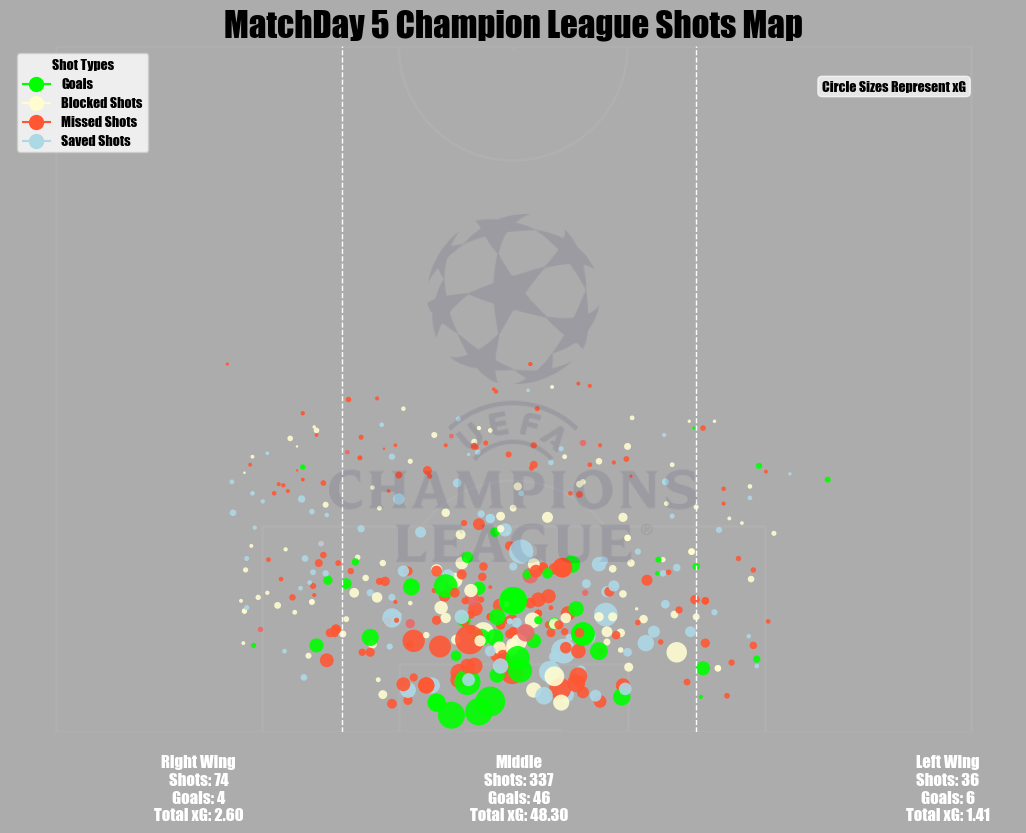

In [145]:
# Create a VerticalPitch with half=True need to pad since the coords are for the bottom half.
pitch = VerticalPitch(half=True, pad_top=-60, pad_bottom=60)
# Shift all shots to the left by subtracting a constant value
##shift_value = 10  # You can adjust this value based on how much you want to shift the shots
##result_df['draw.start.x'] -= shift_value
# Get the figure and axis objects from the pitch
fig, ax = pitch.draw(figsize=(13, 8.5))

# Set the background color of the figure and axis
fig.set_facecolor('#ADACAC')
ax.set_facecolor('#ADACAC')

result_df['edge_color'] = '#ea6969'  # Default edge color
result_df['face_color'] = 'none'  # Blank face color

# Change the edge color where shotType is 'goal'
result_df.loc[result_df['shotType'] == 'goal', 'edge_color'] = '#00FF00'
# Change the edge color where shotType is 'block'
result_df.loc[result_df['shotType'] == 'block', 'edge_color'] = '#fffdd0'
# Change the edge color where shotType is 'miss'
result_df.loc[result_df['shotType'] == 'miss', 'edge_color'] = '#FF5733'
# Change the edge color where shotType is 'save'
result_df.loc[result_df['shotType'] == 'save', 'edge_color'] = '#ADD8E6'

# Draw the scatter plot on the main pitch with solid circles and respective edge colors
scatter = plt.scatter(result_df['draw.start.x'], result_df['draw.start.y'], facecolors=result_df['edge_color'],
                      edgecolors='none', marker='o', s=result_df['xg']*500, linewidth=1, alpha=.9, label='Shots Missed')

# Find the minimum and maximum values of 'draw.start.x'
min_x = result_df['draw.start.x'].min()
max_x = result_df['draw.start.x'].max()

# Set specific bounds for each third
bounds = [0, 25, 56, 100]

# Draw vertical lines dividing the pitch into thirds based on specified bounds
for bound in bounds[1:]:
    plt.axvline(x=bound, color='white', linestyle='--', linewidth=1)

# Annotate each third with shots, goals, and xG information at the top
for i in range(len(bounds) - 1):
    subset = result_df[(bounds[i] <= result_df['draw.start.x']) & (result_df['draw.start.x'] < bounds[i + 1])]
    num_goals = len(subset[subset['shotType'] == 'goal'])
    total_xg = subset['xg'].sum()
    plt.text((bounds[i] + bounds[i + 1]) / 2, pitch.dim.top - 2,  # Adjust the vertical position to be at the top
             f'{["Right Wing", "Middle", "Left Wing"][i]}\nShots: {len(subset)}\nGoals: {num_goals}\nTotal xG: {total_xg:.2f}',
             color='white', ha='center', va='top', fontsize=12)

# Customize the scatter plot as needed
plt.title('MatchDay 5 Champion League Shots Map', c='black', fontsize=25, weight = 'bold')
plt.rcParams["font.family"] = "Impact"

# Add legend with handles using the same edge color and face color as shots
legend_labels = {'goal': 'Goals', 'block': 'Blocked Shots', 'miss': 'Missed Shots', 'save': 'Saved Shots'}
handles = [
    plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markeredgecolor=color, markersize=10, label=label)
    for color, label in zip(['#00FF00', '#fffdd0', '#FF5733', '#ADD8E6'], legend_labels.values())
]
ax.legend(handles=handles, title='Shot Types', loc='upper left')
# Add annotation in the top right corner
plt.annotate('Circle Sizes Represent xG', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='white', alpha=0.7))
# Add transparent logo in the middle of the plot
logo_path = '/Users/calvi/Downloads/Logo_UEFA_Champions_League.png'  # Replace with the path to your logo image
logo = plt.imread(logo_path)
imagebox = OffsetImage(logo, zoom=.8, alpha=0.1)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction', boxcoords="axes fraction", frameon=False)
ax.add_artist(ab)

plt.show()